## 1.
Consideremos la función $f : R → R$ dada por $f(x) = 2x − 1$.

### b)
$X \sim U(0,1)$ ,  $Z \sim N(0,0.25)$ y $Y = f(X) + Z$  
Fijemos $n = 100$. Tomar muestras de X y de Z, calcular Y.  
Realizar ajuste lineal de la forma $Y = X\beta_1 + \beta_0 + \epsilon$ a partir de los samples $(x_1, y_1),......,(x_n, y_n)$ generados y calcular, para cada $i \in$ {1,....,$n$},  

$\epsilon_i = y_i - (x_i\beta_1 + \beta_0)$

Describir la distribucion empirica dada por {$\epsilon_1,.....,\epsilon_n$}

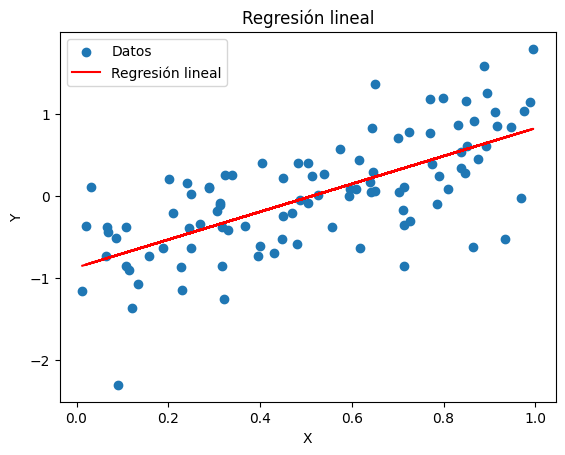

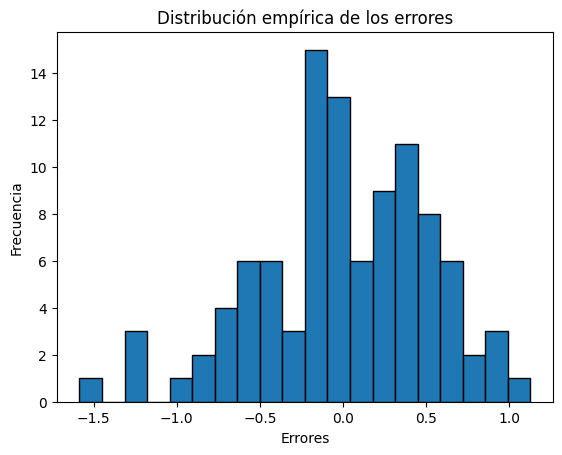

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x -1

n = 100

X = np.random.uniform(0, 1, n)
Z = np.random.normal(0, np.sqrt(0.25), n) # normal recibe mu y sigma

Y = f(X) + Z

X_intercept = np.column_stack([X, np.ones_like(X)])
beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y

predicciones = X_intercept @ beta
errores = Y - predicciones

plt.scatter(X, Y, label='Datos')
plt.plot(X, predicciones, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')
plt.legend()
plt.show()

plt.hist(errores, bins=20, edgecolor='black')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución empírica de los errores')
plt.show()

## 6.
Generar $n = 100$ samples de $X_1 \sim U(0,1)$, de $Z \sim N(0,0.1)$ y de $\epsilon \sim N(0,1)$; a partir de ellas generar $n$ samples de $X_2 = 0.5X_1 + Z$ y de $Y = 2+ 2X_1 + 0.3X_2 + \epsilon$

In [19]:
n = 100
X_1 = np.random.uniform(0, 1, n)

Z = np.random.normal(0,np.sqrt(0.1), n)

e = np.random.normal(0,np.sqrt(1), n)

X_2 = 0.5*X_1 + Z

Y = 2 + 2*X_1 + 0.3*X_2 + e

### a)
Calcular la correlación entre las muestras de $X_1$ y $X_2$, y graficar su distribución conjunta

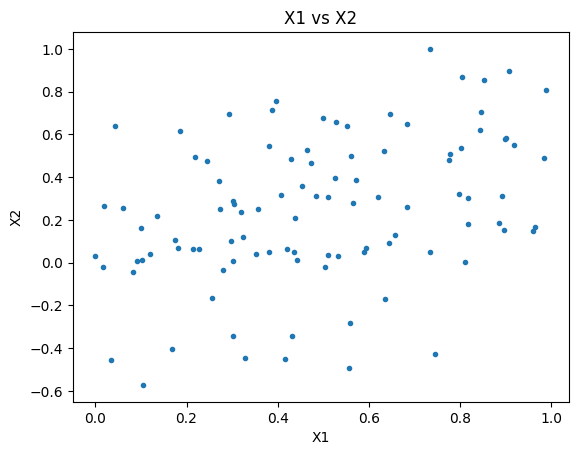

In [20]:
plt.title("X1 vs X2")
plt.plot(X_1, X_2, ".")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [21]:
matriz_correlacion = np.corrcoef(X_1, X_2)
coef_correlacion = matriz_correlacion[0, 1]

print("Correlación de Pearson:", coef_correlacion)

Correlación de Pearson: 0.3753632311058807


### b)
Ajusta un modelo de regresión lineal por mínimos cuadrados para predecir $Y$ utilizando tanto $X_1$ como $X_2$. Describir los resultados obtenidos, incluyendo los coeficientes de regresión $\hat{\beta_0}, \hat{\beta_1}$ y $\hat{\beta_2}$, y analizar la relación entre estos coeficientes y los verdaderos $\beta_0, \beta_1$ y $\beta_2$

In [22]:
X = np.column_stack([X_1, X_2])

X_intercept = np.column_stack([X, np.ones_like(X[:, 0])])
beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y

print(beta)

[2.56814687 0.65791957 1.69990934]


Se parecen a los $\beta$ originales

### c)

#### i)
Ajustar un modelo de regresion lineal por minimos cudrados para $Y$ y analizar resultados utilizando solo las muestras de $X_1$

In [25]:
X_intercept = np.column_stack([X_1, np.ones_like(X_1)])

beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y

predicciones = X_intercept @ beta

residuos = Y - predicciones

RSS = np.sum(residuos**2)
TSS = np.sum((Y - np.mean(Y))**2)
r_cuadrado = 1 - (RSS / TSS)

print("Coeficiente de determinación R^2:", r_cuadrado)
print("Coeficientes :", beta)

Coeficiente de determinación R^2: 0.3410534787710807
Coeficientes : [2.87940468 1.70881536]


#### ii)
Ajustar un modelo de regresion lineal por minimos cudrados para $Y$ y analizar resultados utilizando solo las muestras de $X_2$

In [26]:
X_intercept = np.column_stack([X_2, np.ones_like(X_2)])

beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y

predicciones = X_intercept @ beta

residuos = Y - predicciones

RSS = np.sum(residuos**2)
TSS = np.sum((Y - np.mean(Y))**2)
r_cuadrado = 1 - (RSS / TSS)

print("Coeficiente de determinación R^2:", r_cuadrado)
print("Coeficientes :", beta)

Coeficiente de determinación R^2: 0.1322748333646797
Coeficientes : [1.42276883 2.76286662]
